In [1]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)

data_modeling.h5 is the dataset merged and cleaned in the previous notebook.

In [2]:
store = pd.HDFStore('all_data.h5')
data = store['all_data']

In [5]:
data.head(5)

,unique_id,loan_amount,monthly_payment,grade,income,inq_last_6m,num_open_accts,revol_bal,num_tot_accts,tot_credit_bal,accts_opn_last_6m,inq_last_12m,accts_opn_last_24m,employment_length,home_ownership,int_rate,earliest_cr_line,fico,util_rate,loan_over_income,term,dti,platform_id,Orig_year,Orig_month,loan_status,report_date,mob,bom,ppmt,ipmt,co_amt,prepay_amt,eom,prepay,default
0,A-243811-1,20000.0,470.15,C,75000.0,0.0,15.0,35435.0,25.0,42760.0,0.0,1.0,4.0,3,RENT,14.46,83.0,667.0,76.0,0.27,60,0.1864,A,2016,4,current,JAN2020,45,6804.477673,388.156044,81.993956,0.0,0.0,6416.321629,0,0
1,A-89475-2,6025.0,200.09,C,70000.0,3.0,21.0,8640.0,42.0,100312.0,3.0,6.0,6.0,10,MORTGAGE/OWN,11.99,98.0,682.0,31.2,0.09,36,0.3005,A,2016,5,paid_off,MAY2019,36,198.001430,198.001430,1.978364,0.0,0.0,0.000000,0,0
2,A-383194-3,5450.0,173.72,B,70000.0,0.0,6.0,5746.0,24.0,119491.0,0.0,4.0,6.0,10,MORTGAGE/OWN,9.16,188.0,687.0,56.9,0.08,36,0.0811,A,2016,4,paid_off,APR2019,36,173.563628,173.563628,1.632051,0.0,0.0,0.000000,0,0
3,A-97928-4,6725.0,246.48,D,55000.0,1.0,6.0,8551.0,12.0,287319.0,1.0,5.0,4.0,8,MORTGAGE/OWN,18.99,82.0,662.0,77.7,0.12,36,0.0805,A,2016,5,paid_off,JUN2019,37,1.524140,1.524140,0.024120,0.0,0.0,0.000000,0,0
4,A-257581-5,24000.0,764.99,B,125000.0,0.0,22.0,33290.0,47.0,305776.0,0.0,0.0,3.0,5,MORTGAGE/OWN,9.16,84.0,682.0,80.2,0.19,36,0.1957,A,2016,6,paid_off,JUN2019,36,758.868293,758.868293,5.792695,0.0,0.0,0.000000,0,0


In [3]:
data.drop('report_date', inplace=True, axis=1)

Perform Treatment to the dti


In [4]:
data.loc[(data.platform_id == 'C'),'dti']=data['dti']-data['loan_over_income']
data['post_dti'] =  data['dti'] + data['loan_over_income']

In [5]:
X = data.drop(['default', 'prepay','unique_id', 'loan_status','bom','eom','ppmt','ipmt','prepay_amt','co_amt'], axis=1)
X_mob = X['mob']

X = X.drop('mob', axis=1)

y_default = data['default']
y_prepay = data['prepay']

In [6]:
X.head(5)

,loan_amount,monthly_payment,grade,income,inq_last_6m,num_open_accts,revol_bal,num_tot_accts,tot_credit_bal,accts_opn_last_6m,inq_last_12m,accts_opn_last_24m,employment_length,home_ownership,int_rate,earliest_cr_line,fico,util_rate,loan_over_income,term,dti,platform_id,Orig_year,Orig_month,post_dti
0,20000.0,470.15,C,75000.0,0.0,15.0,35435.0,25.0,42760.0,0.0,1.0,4.0,3,RENT,14.46,83.0,667.0,76.0,0.27,60,0.1864,A,2016,4,0.4564
1,6025.0,200.09,C,70000.0,3.0,21.0,8640.0,42.0,100312.0,3.0,6.0,6.0,10,MORTGAGE/OWN,11.99,98.0,682.0,31.2,0.09,36,0.3005,A,2016,5,0.3905
2,5450.0,173.72,B,70000.0,0.0,6.0,5746.0,24.0,119491.0,0.0,4.0,6.0,10,MORTGAGE/OWN,9.16,188.0,687.0,56.9,0.08,36,0.0811,A,2016,4,0.1611
3,6725.0,246.48,D,55000.0,1.0,6.0,8551.0,12.0,287319.0,1.0,5.0,4.0,8,MORTGAGE/OWN,18.99,82.0,662.0,77.7,0.12,36,0.0805,A,2016,5,0.2005
4,24000.0,764.99,B,125000.0,0.0,22.0,33290.0,47.0,305776.0,0.0,0.0,3.0,5,MORTGAGE/OWN,9.16,84.0,682.0,80.2,0.19,36,0.1957,A,2016,6,0.3857


In [7]:
encoder_1 = LabelEncoder()

# Fit the encoder on the data "platform_id"
encoder_1.fit(X["platform_id"])
X_platform_id_encoded = encoder_1.transform(X["platform_id"])
X["platform_id"] = X_platform_id_encoded

# Fit the encoder on the data "grade"
encoder_2 = LabelEncoder()
encoder_2.fit(X["grade"])
X_grade_encoded = encoder_2.transform(X["grade"])
X["grade"] = X_grade_encoded

# Fit the encoder on the data "home_ownership"
encoder_3 = LabelEncoder()
encoder_3.fit(X["home_ownership"])
X_home_ownership_encoded = encoder_3.transform(X["home_ownership"])
X["home_ownership"] = X_home_ownership_encoded

1. Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial.
2. Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes as in the above case.

LDA Regression

Eigenvalues:
[4.08636919 2.76324814 2.03598711 1.7195785  1.27842803 1.15162232
 1.06352848 1.03928155 1.00046657 0.99606514 0.97585998 0.94824027
 0.90434204 0.8147261  0.75021683 0.64962809 0.61916193 0.46097808
 0.41394077 0.41095647 0.31518851 0.26681455 0.24366209 0.0779199
 0.0138311 ]

Variances (Percentage):
[16.34544947 11.05297414  8.14393484  6.87830251  5.11370359  4.60648161
  4.25410681  4.15711925  4.00185959  3.9842539   3.9034334   3.79295477
  3.61736212  3.25889896  3.0008623   2.59850802  2.47664361  1.84390924
  1.6557603   1.64382313  1.26075194  1.06725642  0.97464672  0.31167906
  0.0553243 ]



Text(0, 0.5, 'Explained variance (%)')

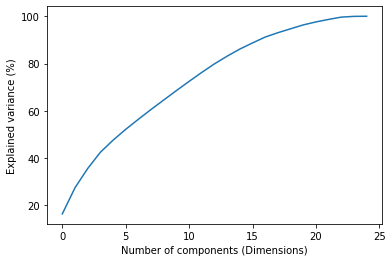

In [8]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X.fillna(0))

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

Logistic Regression

In [11]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X.columns) + 1)],
    index=X.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
loan_amount,0.360297,-0.379246,0.744926,-0.286206,0.121436,-0.077662,-0.027969,0.112662,-0.041650,-0.022197,0.046565,-0.122011,0.113831,-0.095647,0.023585,0.026129,0.007000,-0.039670,-0.024047,-0.046707,-0.024233,-0.008423,0.002479,-0.027002,-0.082915
monthly_payment,0.336316,-0.312512,0.725776,-0.270985,0.155466,-0.147638,0.159218,0.136930,-0.054871,-0.013668,-0.004112,-0.192978,0.169075,-0.022935,0.106856,0.003300,-0.101276,-0.021409,-0.019454,0.004246,-0.013065,-0.002119,-0.001679,0.024996,0.077900
grade,0.068226,0.850032,0.331506,0.006818,-0.000494,0.144497,-0.056192,-0.041732,-0.005590,-0.008914,0.000852,-0.085112,-0.043440,0.004346,0.027358,-0.081573,-0.204390,0.102503,0.033752,0.165417,0.051914,0.015617,-0.014260,-0.190934,0.004894
income,0.016398,-0.012070,0.016104,-0.025631,-0.013183,-0.026695,0.100191,-0.078055,0.898216,-0.371765,0.162963,-0.091473,0.024862,-0.032157,0.003684,-0.001963,-0.002428,-0.006189,-0.001026,0.003470,-0.001265,0.000582,-0.000366,-0.000057,0.000059
inq_last_6m,0.336423,0.361282,-0.244787,-0.516893,0.136374,-0.323939,0.017007,0.108980,0.013474,0.005027,0.044569,0.307650,0.139933,-0.051661,-0.029971,-0.188759,0.077633,-0.117206,0.163430,0.077263,0.037933,-0.280585,0.072539,-0.002001,-0.000036


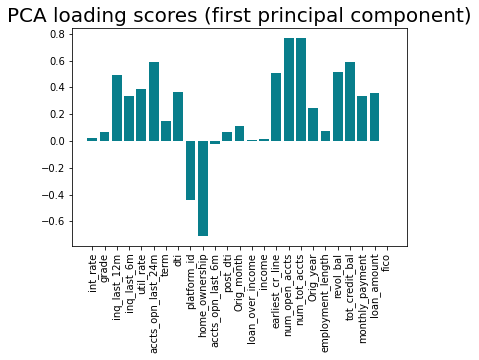

In [13]:
pc1_loadings = loadings.sort_values(by='PC2', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()